# init

In [6]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from shapely.geometry import mapping
import matplotlib.pyplot as plt
from pathlib import Path
from rasterio.transform import from_origin
import json
import numpy as np
#import richdem as rd

In [26]:
#hillshade function from geoexamples.blogspot.com
# Source: http://geoexamples.blogspot.com.br/2014/03/shaded-relief-images-using-gdal-python.html
def hillshade(array, azimuth, angle_altitude):

    x, y = np.gradient(array)
    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))
    aspect = np.arctan2(-x, y)
    azimuthrad = azimuth*np.pi / 180.
    altituderad = angle_altitude*np.pi / 180.

    shaded = (
        (
            np.sin(altituderad) * np.sin(slope) \
     + np.cos(altituderad) * np.cos(slope) \
     * np.cos(azimuthrad - aspect)
     ) +1
     ) / 2
    #normalize shaded between 1 and 255
    normal_shaded = (shaded * 254) + 1 
    
    shaded_raster = shaded.astype('float32')
    return shaded_raster

In [29]:
# slope function 
def slope(array):
    x, y = np.gradient(array)
    #APS: I am really not sure why this is here, need to check the math
    #slope in percent
    #slope_pct = np.sqrt(x*x + y*y)
    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))
    return slope

# input

In [9]:
#input a raster file
#raster_path = Path("D:\\Dropbox\\x\\PostDoc\\23 10 LMU\\13 exp_cases\\24 01 Urban SSP MAN MUM JAK\\GIS_temp\\")
raster_path = Path('/Users/X/Library/CloudStorage/Dropbox/x/PostDoc/23 10 LMU/13 exp_cases/24 01 Urban SSP MAN MUM JAK/GIS_temp')
raster_file = 'MUM_DEM_TanDEM_X_30m.tif'
in_raster = rasterio.open(raster_path/raster_file)

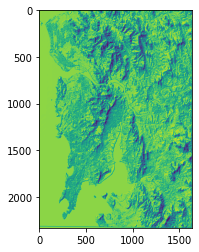

<Axes: >

In [27]:
#calculate hillshade
hillshade_raster = hillshade(in_raster.read(1), 315, 45)

#exporting the raster
out_path = raster_path
out_file = 'MUM_DEM_hillshade_TanDEM_X_30m.tif'
out_url = out_path/out_file
with rasterio.open(out_url, "w", driver='GTiff',
                    height = in_raster.shape[0], width=in_raster.shape[1],
                    count=1, dtype=list(in_raster.dtypes)[0],
                    crs=in_raster.crs, transform = in_raster.transform) as dest:
        dest.write(hillshade_raster, indexes=1)
show(hillshade_raster)

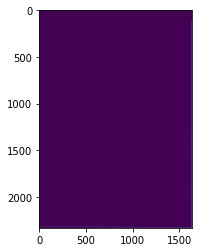

<Axes: >

In [30]:
#calculate slope
slope_raster = slope(in_raster.read(1))

#exporting the raster
out_path = raster_path
out_file = 'MUM_DEM_slope_TanDEM_X_30m.tif'
out_url = out_path/out_file
with rasterio.open(out_url, "w", driver='GTiff',
                    height = in_raster.shape[0], width=in_raster.shape[1],
                    count=1, dtype=list(in_raster.dtypes)[0],
                    crs=in_raster.crs, transform = in_raster.transform) as dest:
        dest.write(slope_raster, indexes=1)
show(slope_raster)